In [560]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


In [561]:
import pandas as pd
# Load the data
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
train = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')
test = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')
sample=pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv')

In [562]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (116023, 52)
Test shape: (29006, 51)


In [563]:
train.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


In [564]:
test.head()

,userChannel,date,browser,device.browserSize,device.browserVersion,deviceType,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,...,trafficSource,sessionId,sessionNumber,sessionStart,userId,locationZone,geoCluster,browserMajor,screenSize,gclIdPresent
0,Social,20170508,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,groups.google.com,1494262567,2,1494262567,59555,8,Region_2,not available in demo dataset,medium,0
1,Organic Search,20170405,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1491433811,1,1491433811,6394,8,Region_1,not available in demo dataset,medium,0
2,Organic Search,20170308,Safari,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1489001815,1,1489001815,38969,8,Region_5,not available in demo dataset,medium,0
3,Referral,20171113,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,docs.google.com,1510593024,30,1510593024,120027,8,Region_2,not available in demo dataset,medium,0
4,Organic Search,20161212,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,(direct),1481559809,1,1481559809,69453,8,Region_3,not available in demo dataset,medium,0


In [565]:
sample.head()

,ID,purchaseValue
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [566]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [567]:
train.describe()

,purchaseValue,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,trafficSource.adwordsClickInfo.page,pageViews,locationZone,totals.bounces,date,totalHits,sessionStart,new_visits
count,1.160230e+05,116023.000000,116023.000000,116023.000000,116023.0,1.160230e+05,4281.000000,116015.000000,116023.0,47148.0,1.160230e+05,116023.000000,1.160230e+05,80518.0
mean,2.656393e+07,61094.356231,0.037019,2.691311,1.0,1.493429e+09,1.019622,8.412352,8.0,1.0,2.016860e+07,10.607371,1.493429e+09,1.0
std,2.051825e+08,35240.756859,0.188808,10.451613,0.0,1.528798e+07,0.174517,14.344937,0.0,0.0,6.182322e+03,19.629576,1.528798e+07,0.0
min,0.000000e+00,0.000000,0.000000,1.000000,1.0,1.470035e+09,1.000000,1.000000,8.0,1.0,2.016080e+07,1.000000,1.470035e+09,1.0
25%,0.000000e+00,30603.500000,0.000000,1.000000,1.0,1.480066e+09,1.000000,1.000000,8.0,1.0,2.016112e+07,1.000000,1.480066e+09,1.0
50%,0.000000e+00,61014.000000,0.000000,1.000000,1.0,1.491646e+09,1.000000,2.000000,8.0,1.0,2.017041e+07,2.000000,1.491646e+09,1.0
75%,0.000000e+00,91616.500000,0.000000,2.000000,1.0,1.505079e+09,1.000000,10.000000,8.0,1.0,2.017091e+07,12.000000,1.505079e+09,1.0
max,2.312950e+10,122276.000000,1.000000,447.000000,1.0,1.525157e+09,5.000000,469.000000,8.0,1.0,2.018043e+07,500.000000,1.525157e+09,1.0


In [568]:
print(train.dtypes.value_counts())

object     37
int64       9
float64     5
bool        1
Name: count, dtype: int64


In [569]:


# Assuming train and test are already loaded as DataFrames
common_columns = list(set(train.columns).intersection(set(test.columns)))

print(f"Number of common columns: {len(common_columns)}")
print("Common Columns Between Train and Test:")
print(common_columns)


Number of common columns: 51
Common Columns Between Train and Test:
['trafficSource.campaign', 'trafficSource.keyword', 'screenSize', 'device.isMobile', 'geoNetwork.networkDomain', 'device.screenColors', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.adwordsClickInfo.isVideoAd', 'device.mobileDeviceBranding', 'userId', 'geoNetwork.continent', 'gclIdPresent', 'browserMajor', 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.page', 'sessionNumber', 'totalHits', 'socialEngagementType', 'device.mobileInputSelector', 'date', 'device.mobileDeviceModel', 'trafficSource.medium', 'geoNetwork.region', 'browser', 'geoCluster', 'totals.visits', 'device.language', 'new_visits', 'device.operatingSystemVersion', 'device.browserSize', 'geoNetwork.networkLocation', 'device.browserVersion', 'userChannel', 'os', 'locationCountry', 'trafficSource.isTrueDirect', 'device.mobileDeviceMarketingName', 'trafficSource.adContent', 'trafficSource.referralPath', 'device.flashVer

In [570]:
# Count missing values in each column
missing_counts = test.isnull().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]


trafficSource.adContent                         28247
trafficSource.adwordsClickInfo.adNetworkType    27899
trafficSource.adwordsClickInfo.isVideoAd        27899
trafficSource.adwordsClickInfo.page             27899
trafficSource.adwordsClickInfo.slot             27899
trafficSource.referralPath                      18395
trafficSource.isTrueDirect                      18245
trafficSource.keyword                           17962
totals.bounces                                  17274
new_visits                                       8912
pageViews                                           3
dtype: int64

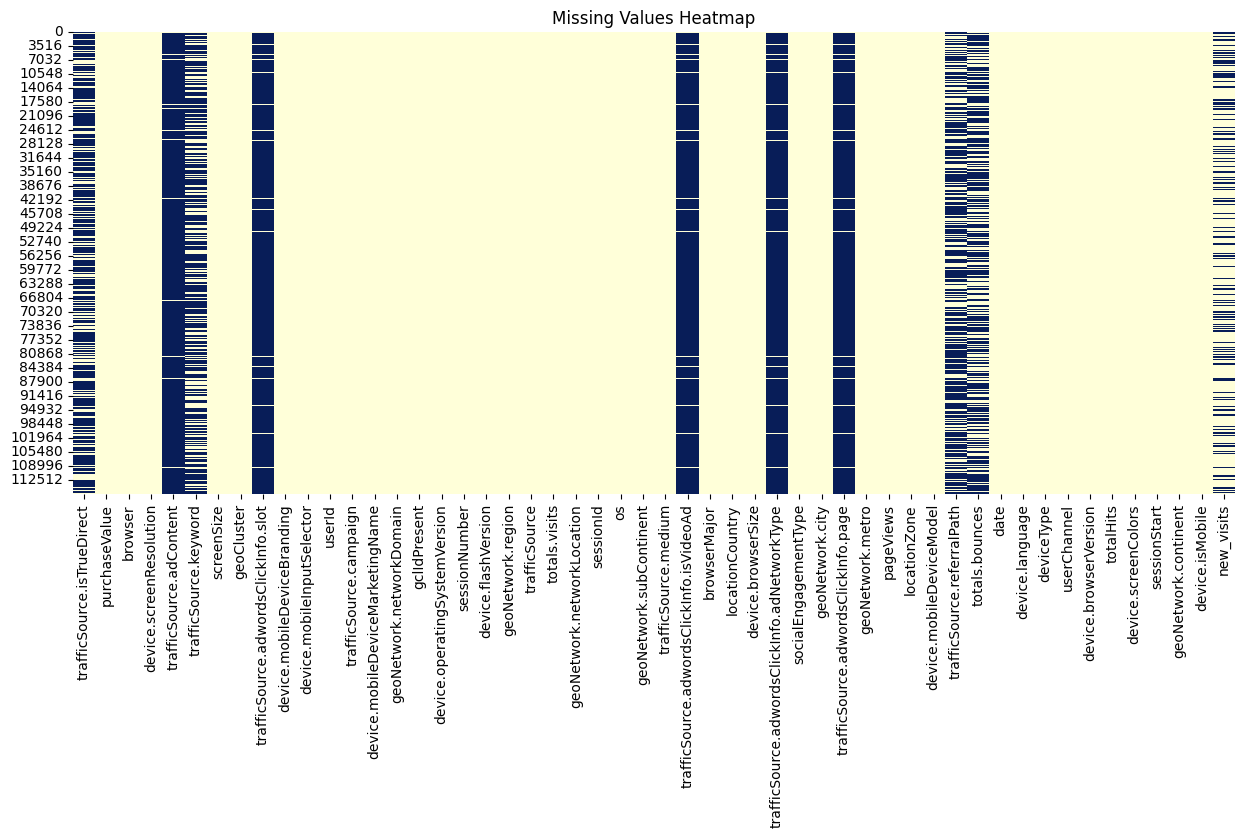

In [571]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.heatmap(train.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()


In [572]:
train.shape


(116023, 52)

In [573]:
test.shape


(29006, 51)

In [574]:
test.isnull().sum()

userChannel                                         0
date                                                0
browser                                             0
device.browserSize                                  0
device.browserVersion                               0
deviceType                                          0
device.flashVersion                                 0
device.isMobile                                     0
device.language                                     0
device.mobileDeviceBranding                         0
device.mobileDeviceMarketingName                    0
device.mobileDeviceModel                            0
device.mobileInputSelector                          0
os                                                  0
device.operatingSystemVersion                       0
device.screenColors                                 0
device.screenResolution                             0
geoNetwork.city                                     0
geoNetwork.continent        

In [575]:
train.isnull().sum()

trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
userId                                               0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
device.operatingSystemVersion                        0
sessionNumber                                        0
device.fla

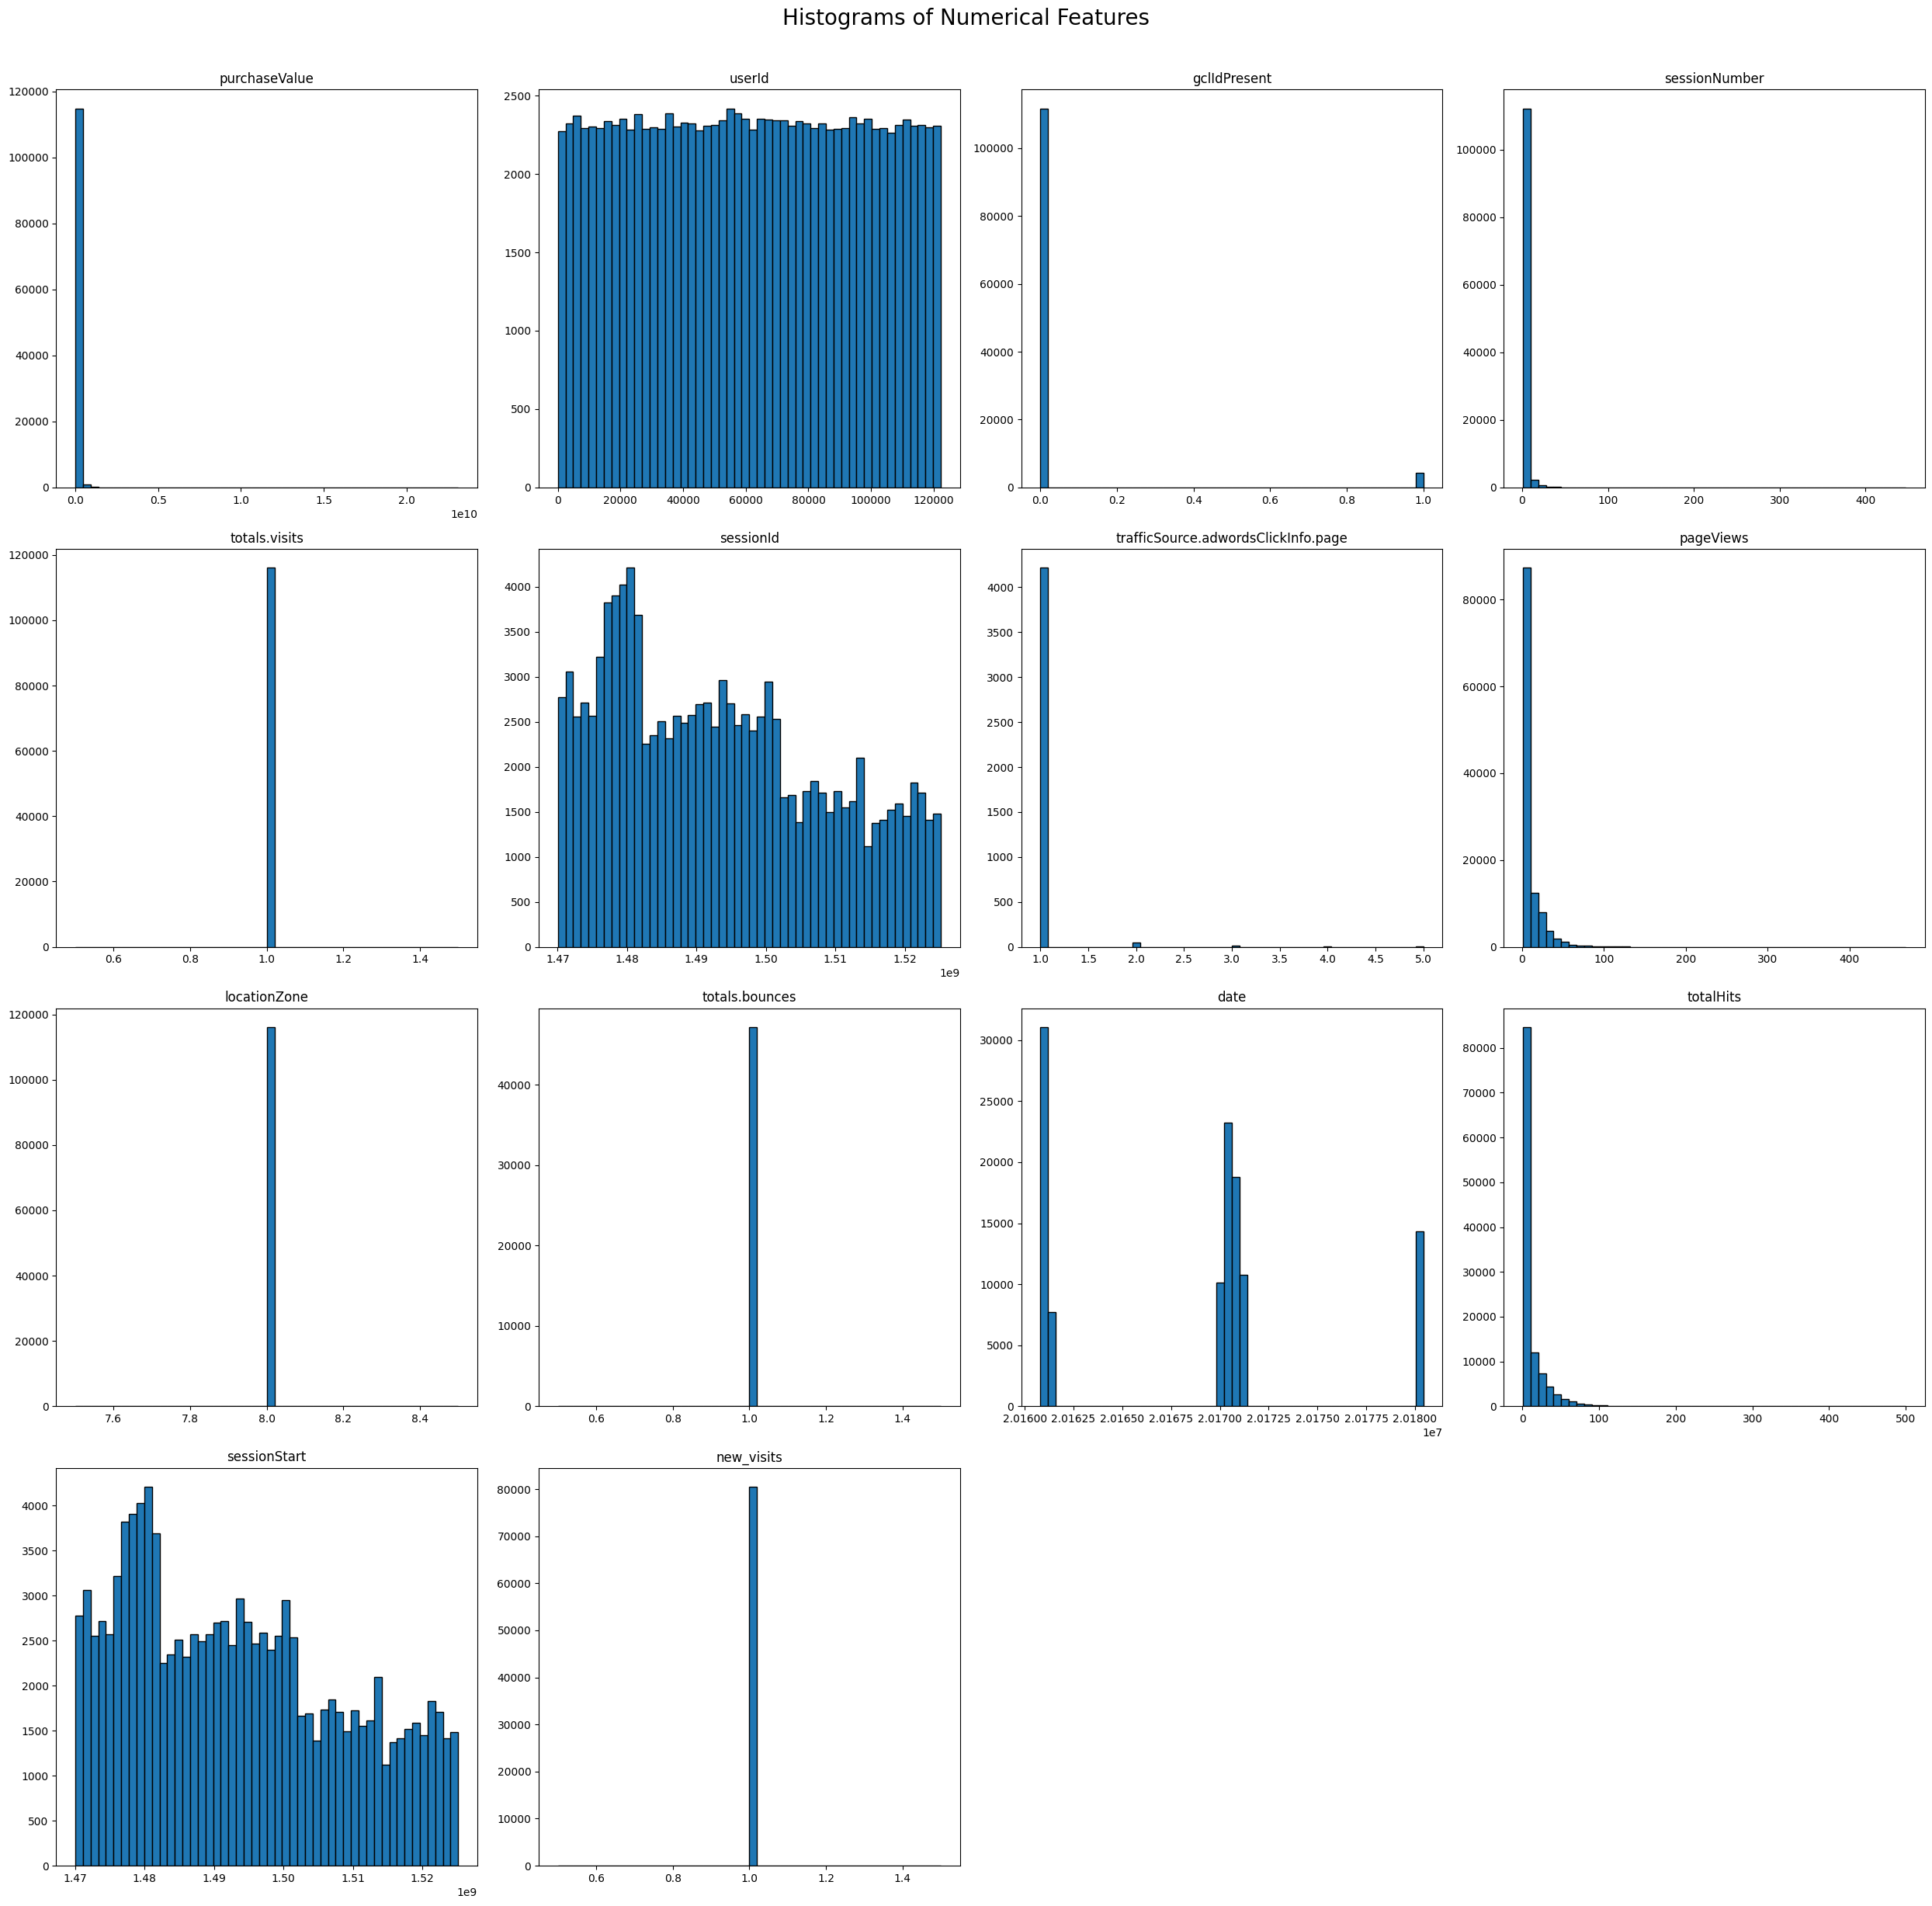

In [576]:
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features
train[numerical_columns].hist(figsize=(25, 25), bins=50, edgecolor='black', grid=False)

plt.suptitle("Histograms of Numerical Features", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to accommodate suptitle
plt.show()


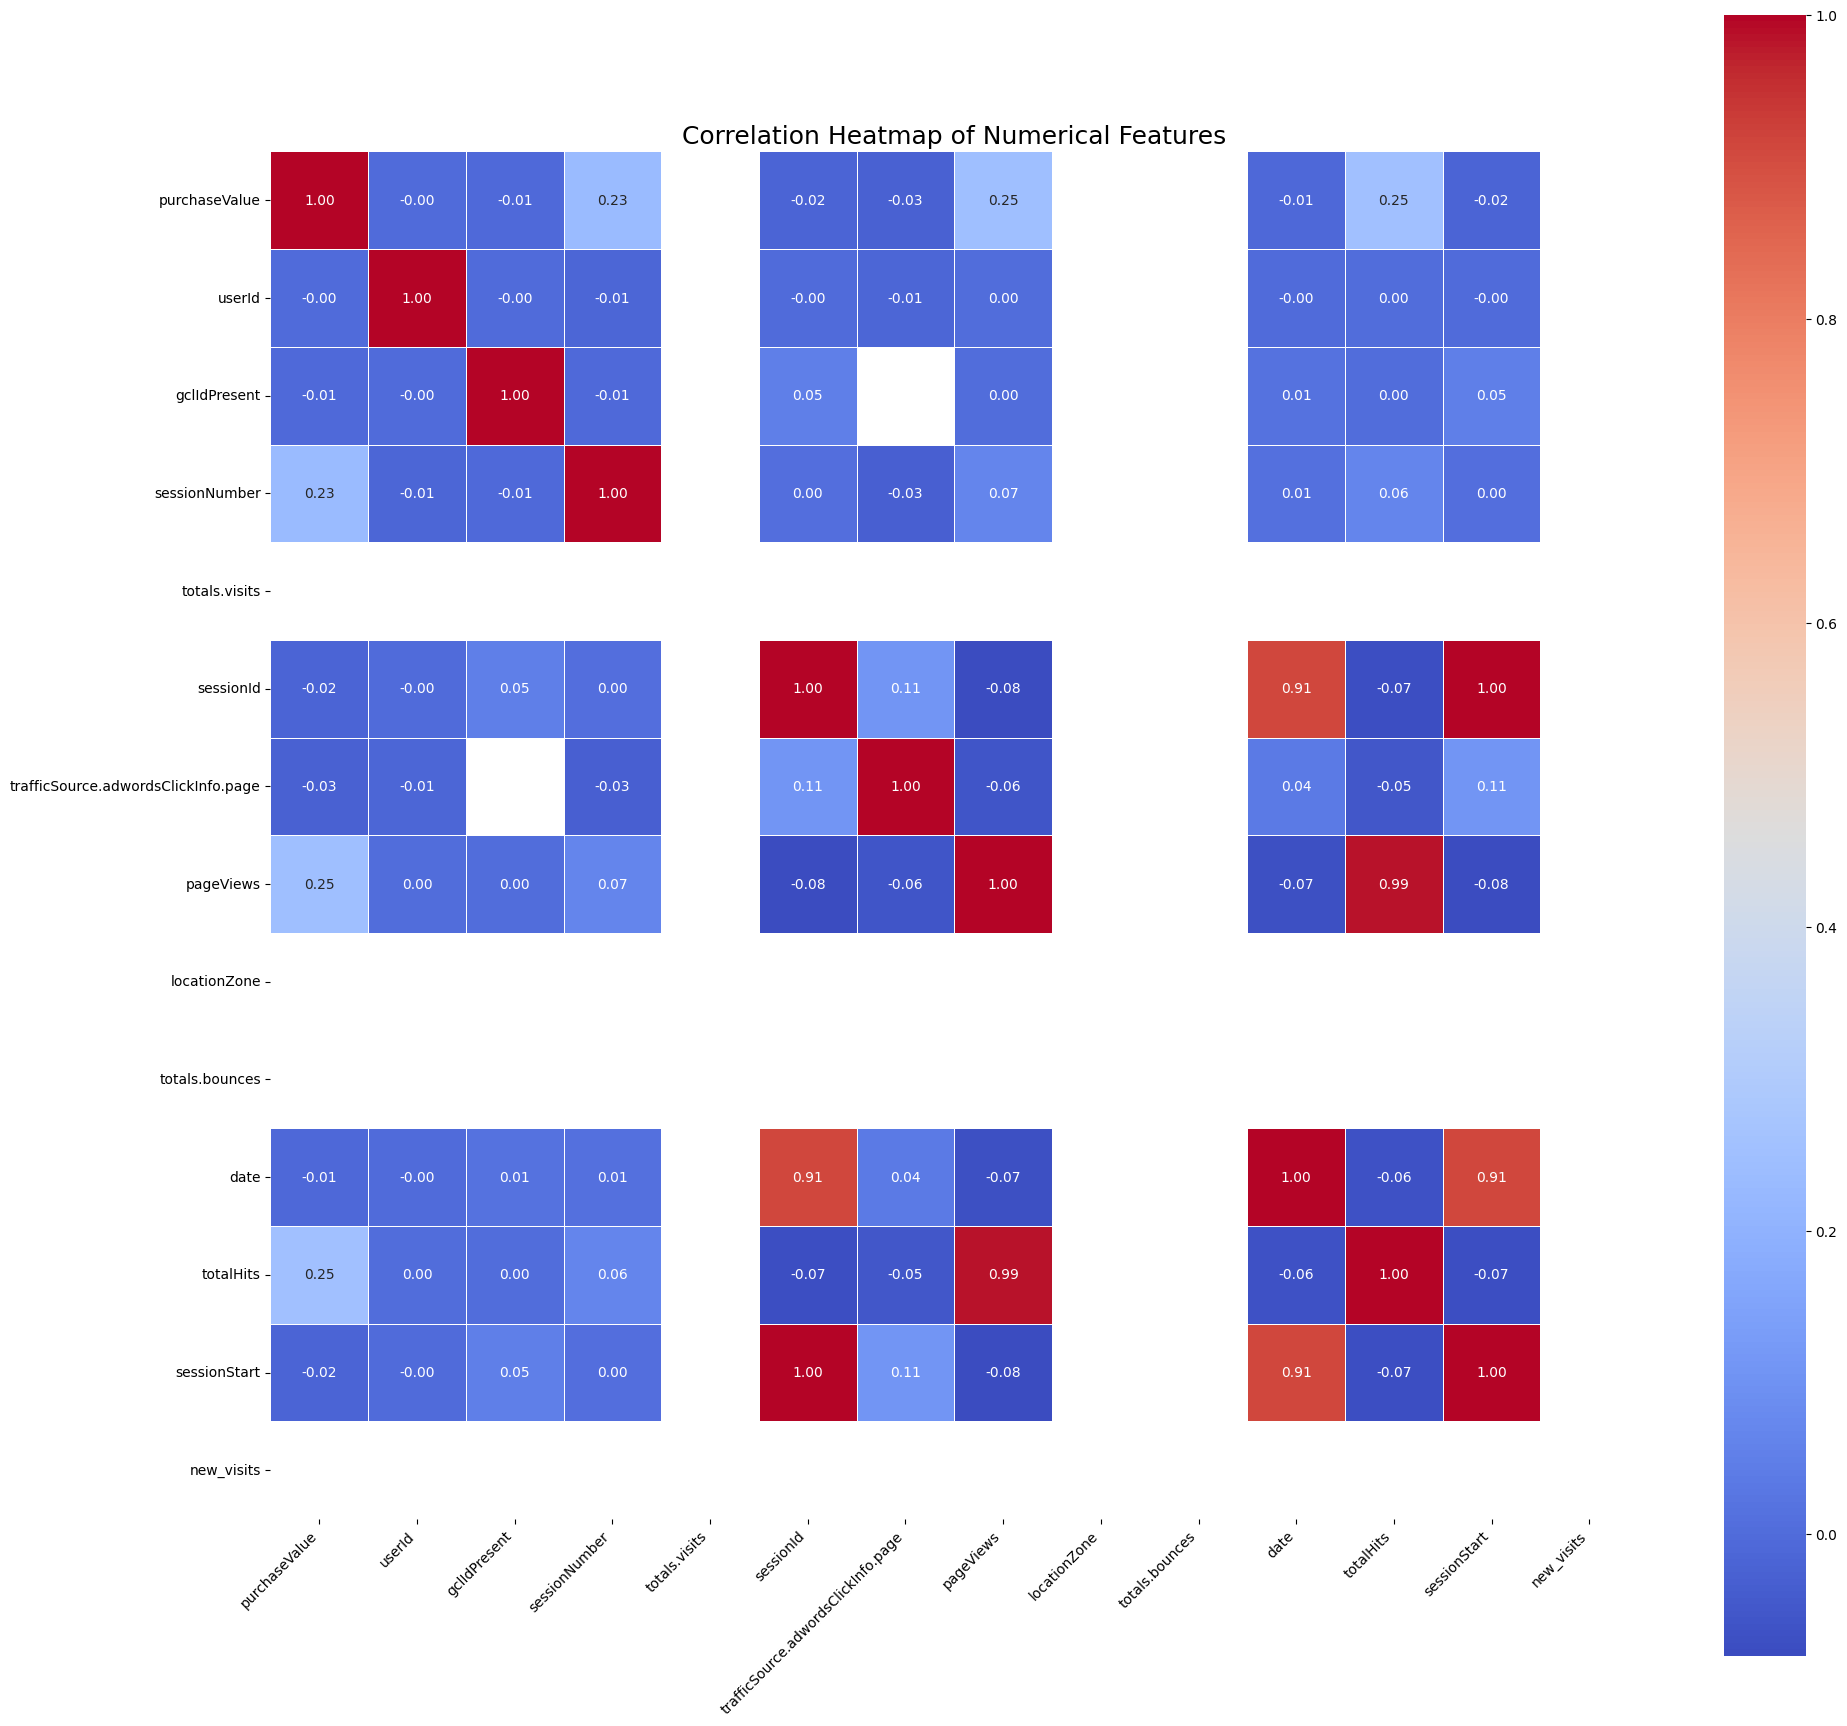

In [577]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features
numerical_features = train.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(20, 18))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [578]:
# Ensure both train and test have the same columns
common_columns = [col for col in train.columns if col in test.columns]

# Reorder test to match the train column order (excluding target)
test = test[common_columns]

# If you want to keep only common columns in train as well (optional)
train = train[common_columns + ['purchaseValue']]  # assuming 'purchaseValue' is the target
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Columns aligned:", train.drop('purchaseValue', axis=1).columns.equals(test.columns))


Train shape: (116023, 52)
Test shape: (29006, 51)
Columns aligned: True


In [579]:
# import pandas as pd
# import numpy as np

# def fill_nulls_with_opposite(df):
#     df_filled = df.copy()

#     for col in df.columns:
#         if df[col].isnull().any():
#             unique_values = df[col].dropna().unique()
#             if len(unique_values) == 1:
#                 val = unique_values[0]
#                 # Fill with opposite value based on type
#                 if isinstance(val, bool):
#                     opposite = not val
#                 elif isinstance(val, (int, float)) and val in [0, 1]:
#                     opposite = 1 - val
#                 elif isinstance(val, str) and val.lower() in ['yes', 'no']:
#                     opposite = 'no' if val.lower() == 'yes' else 'yes'
#                 elif isinstance(val, str) and val.lower() in ['true', 'false']:
#                     opposite = 'false' if val.lower() == 'true' else 'true'
#                 else:
#                     # fallback for unsupported types
#                     opposite = 'Opposite_of_' + str(val)
                
#                 df_filled[col].fillna(opposite, inplace=True)
#             else:
#                 print(f"Column '{col}' has multiple unique non-null values, skipping.")

#     return df_filled


In [580]:
# import pandas as pd

# def drop_single_value_columns(df):
#     # Keep only columns where number of unique non-null values is more than 1
#     return df.loc[:, df.nunique(dropna=True) > 1]



In [581]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# import pandas as pd
# import numpy as np

# def fill_missing_values(df, cat_threshold=10):
#     df_copy = df.copy()

#     # Separate column types
#     num_cols = df_copy.select_dtypes(include=[np.number]).columns
#     cat_cols = df_copy.select_dtypes(include=['object', 'category', 'bool']).columns

#     # 1. Impute numeric columns using median
#     num_imputer = SimpleImputer(strategy='median')
#     df_copy[num_cols] = num_imputer.fit_transform(df_copy[num_cols])

#     # 2. Handle categorical columns
#     for col in cat_cols:
#         nunique = df_copy[col].nunique(dropna=True)
#         if nunique <= cat_threshold:
#             # Low-cardinality: impute with mode
#             cat_imputer = SimpleImputer(strategy='most_frequent')
#             df_copy[col] = cat_imputer.fit_transform(df_copy[[col]])
#             # (Encoding would be applied later)
#         else:
#             # High-cardinality: impute with mode
#             cat_imputer = SimpleImputer(strategy='most_frequent')
#             df_copy[col] = cat_imputer.fit_transform(df_copy[[col]])
#             # (Ordinal encoding can be done later)

#     return df_copy


In [582]:
train.fillna({
    'trafficSource.isTrueDirect': False,
    'trafficSource.adwordsClickInfo.isVideoAd': True,
    'totals.bounces': 0,
    'new_visits': 0,
    'trafficSource.adwordsClickInfo.page': 0
}, inplace=True)


/tmp/ipykernel_35/4020748089.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.fillna({


In [583]:
train = train.drop(columns=[col for col in train.columns if train[col].nunique(dropna=False) == 1])
test = test.drop(columns=[col for col in test.columns if test[col].nunique(dropna=False) == 1])


In [584]:
X = train.drop(columns=['purchaseValue'])
y = train['purchaseValue']

In [585]:

# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [586]:
# Step 1: Separate column types
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()


In [587]:
# Step 2: Set threshold for low cardinality
threshold = 10

low_card_cat_cols = [col for col in categorical_cols if X_train[col].nunique() <= threshold]
high_card_cat_cols = [col for col in categorical_cols if X_train[col].nunique() > threshold]

print("Low-cardinality categorical columns:", low_card_cat_cols)
print("High-cardinality categorical columns:", high_card_cat_cols)


Low-cardinality categorical columns: []
High-cardinality categorical columns: []


In [588]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

In [589]:
from sklearn.preprocessing import OneHotEncoder

low_card_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


In [590]:
from sklearn.preprocessing import OrdinalEncoder

high_card_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])


In [591]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['purchaseValue'])
y = train['purchaseValue']

In [592]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

In [593]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols),
    ('low_card_cat', low_card_pipeline, low_card_cat_cols),
    ('high_card_cat', high_card_pipeline, high_card_cat_cols)
])

In [594]:
# # Fit on training, transform both
# X_train_processed = preprocessor.fit_transform(X_train)
# X_test_processed = preprocessor.transform(X_test)

In [595]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Split features and target from the full dataset
X = train.drop(columns=['purchaseValue'])
y = train['purchaseValue']

# Step 2: Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

# Step 3: Identify categorical and numerical columns
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Step 4: Define transformers
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Step 5: Combine transformers in a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

# Step 6: Fit-transform the training data; transform val and test
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)


# Step 7: Print shapes to verify
print(f"✅ Training shape: {X_train_processed.shape}")
print(f"✅ Validation shape: {X_val_processed.shape}")
print(f"✅ Test shape: {X_test_processed.shape}")


✅ Training shape: (92818, 31)
✅ Validation shape: (23205, 31)
✅ Test shape: (29006, 31)


In [596]:
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=5) #Split into train and validation sets


In [597]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Step 1: Initialize the model
# rf_model = RandomForestRegressor(n_estimators=500, max_depth=None, random_state=42, n_jobs=-1)

# # Step 2: Train the model
# rf_model.fit(X_train_processed, y_train)

# # Step 3: Predict on validation set
# val_preds = rf_model.predict(X_val_processed)

# # Step 4: Evaluate
# mse = mean_squared_error(y_val, val_preds)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_val, val_preds)

# print(f"✅ RMSE on validation set: {rmse:.4f}")
# print(f"✅ R² Score on validation set: {r2:.4f}")


#### ✅ RMSE on validation set: 158754548.7330
✅ R² Score on validation set: 0.5008  
0.5017
0.5006
0.5067

In [598]:
# # Step 5: Predict on test set
# test_preds = rf_model.predict(X_test_processed)

# # Create submission DataFrame
# submission = pd.DataFrame({
#    'id': range(len(test_preds)),  # Generate sequential ID
#     'purchaseValue': test_preds
# })

# # Save to CSV
# submission.to_csv("submission.csv", index=False)
# print("✅ Submission file created as 'submission.csv'")

TUNENING****

In [599]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV

# param_dist = {
#     'n_estimators': [100, 300, 500, 1000],
#     'max_depth': [10, 20, 30, 50, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# rf = RandomForestRegressor(random_state=42)

# rf_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=25,  # Increase for better results
#     cv=3,
#     verbose=2,
#     n_jobs=-1,
#     scoring='r2'
# )

# rf_search.fit(X_train_processed, y_train)

# print("Best parameters:", rf_search.best_params_)

# # Predict using the best model
# best_rf = rf_search.best_estimator_
# val_preds = best_rf.predict(X_val_processed)

# from sklearn.metrics import r2_score
# print(f"✅ Tuned R² score: {r2_score(y_val, val_preds):.4f}")


XGB MODEL****


In [600]:
#Assuming this was your earlier code

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Define column types
cat_features = X.select_dtypes(include=['object']).columns
num_features = X.select_dtypes(include=['int64', 'float64', 'bool']).columns

# Transformer
ct = ColumnTransformer([
   ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('scaler', MinMaxScaler(), num_features)
])

# Step 6: Fit-transform the training data; transform val and test
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)


In [498]:
# #from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split
# import numpy as np

# # Assuming `train` and `y` are preprocessed already
# X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=5)

# # Initialize XGBRegressor
# xgb_model = XGBRegressor(
#     n_estimators=1000,
#     max_depth=7,
#     learning_rate=0.1,
#     subsample=1.0,
#     colsample_bytree=1.0,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit
# xgb_model.fit(X_train, y_train)

# # Predict
# val_preds = xgb_model.predict(X_val)

# # Evaluate
# rmse = np.sqrt(mean_squared_error(y_val, val_preds))
# r2 = r2_score(y_val, val_preds)

# print(f"✅ XGBoost RMSE on validation set: {rmse:.4f}")
# print(f"✅ XGBoost R² Score on validation set: {r2:.4f}")


✅ XGBoost RMSE on validation set: 150908927.4801
✅ XGBoost R² Score on validation set: 0.5489


.0.533,0.5359,0.5438,0.5483 ,05503

In [602]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataset to avoid modifying original
train_encoded = train.copy()

# Encode all object-type columns
for col in train_encoded.select_dtypes(include='object').columns:
    train_encoded[col] = train_encoded[col].astype(str)  # Handle NaNs as 'nan'
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train_encoded[col])

print("✅ All object columns converted to numeric.")


✅ All object columns converted to numeric.


In [603]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Create a copy to avoid modifying original
train_encoded = train.copy()

# Label encode all object columns
for col in train_encoded.columns:
    if train_encoded[col].dtype == 'object':
        train_encoded[col] = train_encoded[col].astype(str).fillna('missing')
        try:
            le = LabelEncoder()
            train_encoded[col] = le.fit_transform(train_encoded[col])
        except Exception as e:
            print(f"Dropping column {col} due to encoding error: {e}")
            train_encoded.drop(col, axis=1, inplace=True)

# Drop columns that are still not numeric
non_numeric_cols = train_encoded.select_dtypes(exclude=['int', 'float', 'bool']).columns
if len(non_numeric_cols) > 0:
    print(f"⚠️ Dropping remaining non-numeric columns: {list(non_numeric_cols)}")
    train_encoded.drop(columns=non_numeric_cols, inplace=True)

print("✅ Final dtypes after encoding:")
print(train_encoded.dtypes.value_counts())


✅ Final dtypes after encoding:
int64      27
float64     5
bool        3
Name: count, dtype: int64


In [604]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming `train_encoded` is your final preprocessed data
# And `y` is your target variable

# Split the data
X_train, X_val, y_train, y_val = train_test_split(train_encoded, y, test_size=0.2, random_state=5)

# Initialize the LGBM Regressor
lgbm_model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Train the model
lgbm_model.fit(X_train, y_train)

# Predict
val_preds = lgbm_model.predict(X_val)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
r2 = r2_score(y_val, val_preds)

print(f"✅ LightGBM RMSE on validation set: {rmse:.4f}")
print(f"✅ LightGBM R² Score on validation set: {r2:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3038
[LightGBM] [Info] Number of data points in the train set: 92818, number of used features: 35
[LightGBM] [Info] Start training from score 26469176.446465
✅ LightGBM RMSE on validation set: 67739374.8822
✅ LightGBM R² Score on validation set: 0.9091


In [605]:
# Step 5: Predict on test set
test_preds = lgbm_model.predict(X_test_processed)

# Create submission DataFrame
submission = pd.DataFrame({
   'id': range(len(test_preds)),  # Generate sequential ID
    'purchaseValue': test_preds
})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("✅ Submission file created as 'submission.csv'")

ValueError: Number of features of the model must match the input. Model n_features_ is 35 and input n_features is 31

In [ ]:
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Step 1: Initialize the model
# xgb_model = XGBRegressor(
#     n_estimators=100,
#     max_depth=19,  # Or try a number like 6
#     learning_rate=0.05,
#     random_state=42,
#     n_jobs=-1,
#     verbosity=1
# )

# # Step 2: Train the model
# xgb_model.fit(X_train_processed, y_train)

# # Step 3: Predict on validation set
# val_preds = xgb_model.predict(X_val_processed)

# # Step 4: Evaluate
# mse = mean_squared_error(y_val, val_preds)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_val, val_preds)

# print(f"✅ RMSE on validation set: {rmse:.4f}")
# print(f"✅ R² Score on validation set: {r2:.4f}")
